### This is a library to find the best performing configuration from a set of dimensions (i.e. schemas, partition, storage) which can be specified inside the <b>settings.yaml</b> file in the resource

In [ ]:
%pip install PAPyA==0.1.0

### Load the configuration file and log files location for the experiment

<p>Configurations for SP2Bench Data</p>

In [1]:
config_sp2bench = "settings.yaml" # config file location
logs_sp2bench = "log_twoDimension" # logs file location

#### <u>Configuration file</u> <br>
The configuration file is a yaml data-serialization language which has two main parts, the dimensions and the number of query experiments. You can add more dimensions here or change these existing dimensions to anything you need

<i>Example :</i> 
```yaml
dimensions:
    storage: ["csv", "avro", "parquet", "orc"]
    schemas: ["st", "vt", "pt"]
    

query: 11
```

#### <u>Log file structure</u> <br>
the structure of the log files must follow the order of dimensions in the configuration file (i.e. {schemas}.{partition}.{storage}.txt) and the subfolders should be the ranking sets of the experiments (i.e. dataset sizes)

<i>Example :</i>
```
UI Module
└───log_twoDimension
    │
    |───10M
    |    │   st.csv.txt
    |    │   st.avro.txt
    |    │   ...
    │
    └───100k
        |   st.csv.txt
        │   st.avro.txt
        │   ...
```

### Single Dimensional Ranking

<b>SDRank</b> is a class module from PAPyA library to calculate ranking score _R_ for each dimension independently that operates over a log-based structure that user specified on the configuration file.<br> 
The value of _R_ represents the performance of a particular configuration (higher value means better performing configuration). We used Ranking Function _R_ below to calculate the rank scores:

$$R =\sum \limits _{r=1} ^{d} \frac{O_{dim} * (d-r)}{|Q| * (d-1)}, 0<R<=1$$

$d$         : total number of parameters (options) in a particular dimension<br>
$O_{dim}$   : number of occurences of the dimension placed at rank $r$ (Rank 1, Rank 2, Rank 3, ...)<br>
$|Q|$       : total number of queries

### PAPyA.Rank.SDRank

#### <i>class</i> Rank.<b>SDRank</b>(<i>config_path, log_path, ranking_sets, dimension</i>)
<i>Parameters:</i> <br>
&emsp; <b>config_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your configuration file(s). <i>i.e ./UIModule/settings_watdiv.yaml</small></i><br>
&emsp;<b>log_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your log file(s). <i>i.e ./UI Module/log_watdiv</small></i><br>
&emsp;<b>ranking_sets : str</b><br>
&emsp;&emsp;<small>Ranking sets of user choice. <i>i.e dataset sizes (100M)</small></i><br>
&emsp;<b>dimension : str</b><br>
&emsp;&emsp;<small>A single dimension to be ranked. <i>i.e schemas</small></i><br>


In [3]:
from PAPyA.file_reader import FileReader
FileReader(config_sp2bench, logs_sp2bench, '10M', 'schemas').file_reader()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
csv.st,123248.2,451757.6,89441.0,535182.6,321688.2,299036.0,406003.40,206557.2,4900.80,42308.0,413887.0
csv.vt,15476.0,58124.8,14160.8,347332.6,87257.2,70167.2,186436.60,138586.0,5919.40,2191.8,44058.2
csv.pt,11031.4,85574.2,5823.4,306116.2,94804.4,50042.6,446603.74,46792.2,19565.92,35564.6,10383.6
avro.st,66243.6,213020.0,40276.6,372877.8,165472.0,150775.6,263349.60,108848.4,17787.20,14708.0,217210.0
avro.vt,11774.0,42061.2,5511.4,376007.4,48264.8,60752.8,174269.20,52103.0,2957.00,1037.0,30005.4
avro.pt,9071.0,69561.6,7706.8,374609.6,64704.0,123377.6,446603.74,38144.2,19565.92,20369.8,12211.4
orc.st,10564.4,36559.4,6937.4,231401.0,54636.4,39466.8,138915.80,49245.0,1152.40,1388.0,85494.4
orc.vt,4251.2,25417.6,1647.4,286004.6,28974.4,39877.2,133578.40,17078.0,670.40,401.6,17605.8
orc.pt,3068.2,43260.0,1980.8,276344.2,39733.6,24067.8,446603.74,20396.4,19565.92,4347.2,5422.6
parquet.st,11630.8,41387.0,8041.0,225791.8,57635.6,42156.4,138744.00,49655.6,1838.80,1534.2,87921.4


In [4]:
# this class takes single dimension and dataset sizes as parameters that user specified inside their log files
from Rank import SDRank

schemaSDRank_10M = SDRank(config_sp2bench, logs_sp2bench, '10M', 'schemas')
schemaSDRank_100K = SDRank(config_sp2bench, logs_sp2bench, '100K', 'schemas')
storageSDRank_10M = SDRank(config_sp2bench, logs_sp2bench, '10M', 'storage')
storageSDRank_100K = SDRank(config_sp2bench, logs_sp2bench, '100K', 'storage')

### Rank.SDRank.calculateRank

#### SDRank.<b>calculateRank</b>(<i>*args</i>)
<small>The function that automates calculating the rank scores of a single dimension using the Ranking Function above.</small><br><br>
<small>Returns a table of configurations which is sorted based on the best performing configuration according to their Ranking Score along with number of occurences of the dimension being placed at the rank _r_ (1st, 2nd, 3rd, ...)</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>*args : str or list</b><br>
&emsp;&emsp;<small>This method takes an arbitrary number of parameters of strings and lists.<br>
&emsp;&emsp;&ensp;str -> slice the table according to string input. <i>i.e. "predicate" will slice the table by the <b>predicate</b> partitioning</i><br>
&emsp;&emsp;&ensp;list -> remove some queries out of the ranking calculations. <i>i.e [7,8,9] will remove query <b>7, 8,and 9</b> from the calculation</small></i><br>


In [5]:
# single dimension ranking by storage without excluding queries
schemaSDRank_10M.calculateRank()

,Rank 1,Rank 2,Rank 3,Result
avro.vt,7.0,3.0,1.0,0.772727
orc.vt,7.0,2.0,2.0,0.727273
parquet.vt,6.0,4.0,1.0,0.727273
csv.vt,4.0,7.0,0.0,0.681818
csv.pt,6.0,3.0,2.0,0.681818
parquet.pt,4.0,4.0,3.0,0.545455
avro.pt,3.0,5.0,3.0,0.500000
orc.pt,3.0,4.0,4.0,0.454545
orc.st,1.0,5.0,5.0,0.318182
avro.st,1.0,3.0,7.0,0.227273


In [6]:
schemaSDRank_100K.calculateRank()

,Rank 1,Rank 2,Rank 3,Result
csv.vt,7.0,3.0,1.0,0.772727
avro.vt,7.0,3.0,1.0,0.772727
csv.pt,4.0,5.0,2.0,0.590909
parquet.vt,4.0,5.0,2.0,0.590909
orc.pt,6.0,0.0,5.0,0.545455
orc.vt,2.0,7.0,2.0,0.500000
parquet.pt,5.0,1.0,5.0,0.500000
avro.pt,3.0,4.0,4.0,0.454545
orc.st,3.0,4.0,4.0,0.454545
parquet.st,2.0,5.0,4.0,0.409091


In [9]:
storageSDRank_10M.calculateRank()

,Rank 1,Rank 2,Rank 3,Rank 4,Result
orc.st,9.0,2.0,0.0,0.0,0.939394
parquet.vt,6.0,5.0,0.0,0.0,0.848485
orc.vt,5.0,6.0,0.0,0.0,0.818182
parquet.st,2.0,9.0,0.0,0.0,0.727273
orc.pt,5.0,4.0,0.0,2.0,0.696970
parquet.pt,4.0,5.0,0.0,2.0,0.666667
avro.st,0.0,0.0,10.0,1.0,0.303030
avro.vt,0.0,0.0,10.0,1.0,0.303030
avro.pt,0.0,0.0,5.0,6.0,0.151515
csv.pt,0.0,0.0,4.0,7.0,0.121212


In [10]:
# single dimension ranking by storage excluding query 7,8,and 9
storageSDRank_100K.calculateRank()

,Rank 1,Rank 2,Rank 3,Rank 4,Result
orc.st,8.0,2.0,1.0,0.0,0.878788
parquet.st,3.0,8.0,0.0,0.0,0.757576
avro.vt,6.0,1.0,1.0,3.0,0.636364
orc.pt,3.0,5.0,2.0,1.0,0.636364
parquet.vt,2.0,6.0,2.0,1.0,0.606061
csv.pt,4.0,3.0,2.0,2.0,0.606061
parquet.pt,3.0,1.0,6.0,1.0,0.515152
csv.vt,1.0,4.0,5.0,1.0,0.484848
avro.st,0.0,0.0,10.0,1.0,0.303030
orc.vt,2.0,0.0,3.0,6.0,0.272727


### Rank.SDRank.plotRadar

#### SDRank.<b>plotRadar</b>()

<small>Ranking over one dimension is insufficient when it counts multiple dimensions. The presence of trade-offs reduces the accuracy of single dimension ranking functions which could be seen in the radar plot below.</small><br><br>
<small>This method returns a radar chart that shows the presence of trade-offs by using the single dimension ranking criterion that reduces the accuracy of the other dimensions</small>

### Rank.SDRank.plot

#### SDRank.<b>plot</b>(<i>view</i>)
<small>In addition to radar plot, PAPyA also provides visualization that shows the performance of a single dimension parameters that user can choose in terms of their rank scores</small><br><br>
<small>This method returns a bar chart that shows a particular dimension rankings, pivoting another dimension by user viewing projection</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>view : str</b><br>
&emsp;&emsp;<small>This method takes a string of dimensional option that user choose to view as projection</small><br><br>
<i>Example:</i><br>
&emsp;&emsp;<small>_Schemas_ single dimensional ranking viewed from _Predicate Partitioning_ by pivoting over the _Storage_ dimension</small>


In [10]:
from Rank import SDRank

# example of schema dimension plots
SDRank(config_sp2bench, logs_sp2bench, '10M', 'schemas').plot()

TypeError: SDRank.plot() missing 1 required positional argument: 'view'

### Rank.SDRank.plotBox

#### SDRank.<b>plotBox</b>(<i>q = None</i>)
<small>In order to show the distributions of our query runtimes data, we need a box plot diagram to compare these data between queries in our experiment. Box plot can help provide information at a glance, giving us general information about our data</small><br><br>
<small>This method returns a box plot diagram that shows both maximum and minimum runtimes of each individual queries for a particular single dimensional ranking</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>q : list</b><br>
&emsp;&emsp;<small>This method can take a list of column names that user can specify to choose for plotting to have a more precise box plot diagram. i.e. list of ["Q1", "Q2", "Q3"] will output a <br>
&emsp;&emsp;&ensp;box plot only for those queries </small>

In [ ]:
from Rank import SDRank

# Box plot example of all queries of schema ranking dimension
SDRank(config_watdiv, logs_watdiv, '100M', 'schemas').plotBox()

# Box plot example of query 1,2,3 of schema ranking dimension
SDRank(config_watdiv, logs_watdiv, '100M', 'schemas').plotBox(["Q1", "Q2", "Q3"])

### Multi Dimensional Ranking

With the presence of the trade-offs introduced in the single dimensional ranking function, we propose an optimization technique that aims to find the non-dominated solutions or the configuration combinations by optimizing all dimensions at the same time which utilize the NSGA2 Algorithm.<br>
In this experiment, we provide two ways to use the NSGA2 Algorithm:
- The first method is _paretoAgg_ which operates on the single dimensional ranking criteria. This method aims to maximize performance of the three ranks altogether
- The second method is _paretoQ_ which apply the algorithm considering the rank sets obtained by sorting each query results individually. This method aims at minimizing query runtimes of the ranked dimensions

### PAPyA.Rank.MDRank

#### <i>class</i> Rank.<b>MDRank</b>(<i>config_path, log_path, ranking_sets</i>)
<i>Parameters:</i> <br>
&emsp; <b>config_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your configuration file(s). <i>i.e ./UIModule/settings_watdiv.yaml</small></i><br>
&emsp;<b>log_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your log file(s). <i>i.e ./UI Module/log_watdiv</small></i><br>
&emsp;<b>ranking_sets : str</b><br>
&emsp;&emsp;<small>Ranking sets of user choice. <i>i.e dataset sizes (100M)</small></i><br>

In [7]:
from Rank import MDRank

config = 'settings.yaml'
log = 'log_twoDimension'

# example of MDRank class with 100M dataset size as ranking set of the experiment
multiDimensionRank_10M = MDRank(config, log, '10M')
multiDimensionRank_100K = MDRank(config, log, "100K")

### Rank.MDRank.paretoQ

#### MDRank.<b>paretoQ</b>(<i>q</i>)
<small>This method returns a table of configuration solutions as well as their dominated ones, according to the Non-Dominated Sorting Algorithm II (NSGA2) that was applied to minimizing query runtimes of the ranked dimensions</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>q : list</b><br>
&emsp;&emsp;<small>remove some queries out of the ranking calculations. <i>i.e [7,8,9] will remove query <b>7, 8,and 9</b> from the calculation</small></i>

In [8]:
multiDimensionRank_10M.paretoQ()

,Solution,Dominated
0,orc.vt,avro.vt
1,parquet.vt,csv.pt
2,orc.st,csv.vt
3,parquet.pt,avro.pt
4,orc.pt,avro.st
5,parquet.st,csv.st


In [9]:
multiDimensionRank_100K.paretoQ()

,Solution,Dominated
0,parquet.vt,avro.pt
1,avro.vt,avro.st
2,csv.vt,csv.st
3,csv.pt,
4,orc.st,
5,orc.pt,
6,parquet.st,
7,parquet.pt,
8,orc.vt,


### Rank.MDRank.paretoAgg

#### MDRank.<b>paretoAgg</b>(<i>q</i>)
<small>This method returns a table of configuration solutions as well as their dominated ones, according to the Non-Dominated Sorting Algorithm II (NSGA2) that was applied on the single dimensional ranking criteria which maximizes the performance of all ranking sets altogether</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>q : list</b><br>
&emsp;&emsp;<small>remove some queries out of the ranking calculations. <i>i.e [7,8,9] will remove query <b>7, 8,and 9</b> from the calculation</small></i>

In [10]:
multiDimensionRank_10M.paretoAgg()

,Solution,Dominated
0,parquet.vt,orc.vt
1,orc.st,parquet.pt
2,avro.vt,orc.pt
3,,parquet.st
4,,csv.pt
5,,csv.vt
6,,avro.pt
7,,avro.st
8,,csv.st


In [11]:
multiDimensionRank_100K.paretoAgg()

,Solution,Dominated
0,avro.vt,csv.vt
1,orc.st,csv.pt
2,,orc.pt
3,,parquet.st
4,,parquet.pt
5,,orc.vt
6,,avro.st
7,,avro.pt
8,,csv.st


### Rank.MDRank.plot

#### MDRank.<b>plot</b>()
<small>This method returns a plot for multi dimensional ranking solutions according to paretoAgg as shades of green projected in a three dimensional space</small>

(3, 2) (9, 2)


IndexError: index 2 is out of bounds for axis 1 with size 2

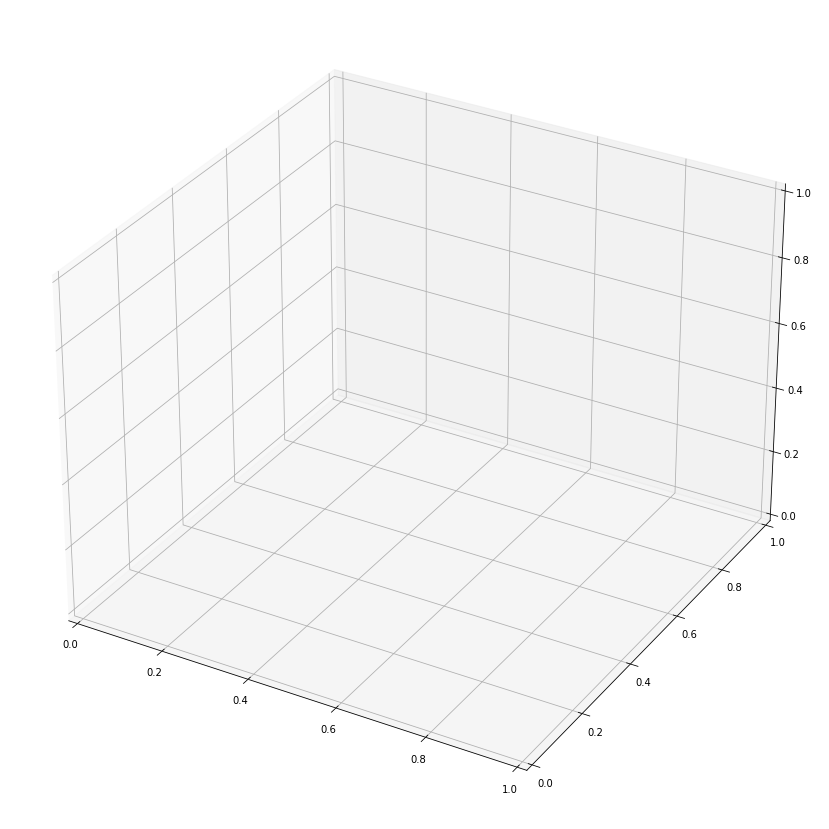

In [9]:
multiDimensionRank.plot()

### Ranking Criteria Validation

This library provides two metrics of evaluation to evaluate the goodness of the ranking criteria the _conformance_ and _coherence_

- Conformance measures the adherence of the top-ranked configurations according to the actual query positioning of thoses configurations. We calculate conformance according to the equation below:

$$A(R^k) = 1 - \sum \limits _{i=0} ^{|Q|} \sum \limits _{j=0} ^{k} \frac {\bar{A}(i,j)}{|Q|*k}$$

Consider $R_{s}$ ranking and the top-3 ranked configurations are ${c_{1},c_{2},c_{3}}$, that overlaps only with the bottom-3 ranked configuration in query $|Q|$. That is, ${c_{4},c_{2},c_{5}}$. For example, $c_{2}$ is in the $59^{th}$ position out of 60 positions. <br>
Thus, $A(R^k) = 1- \frac {1}{(11*3)}$, when $k = 3$ and $|Q| = 11$

- Coherence is the measure agreement between two ranking sets that uses the same ranking criteria accross different experiments. We used Kendall's Index to calculate coherence, which counts the number of dis(agreements) between two ranking sets

$$K(R_{1}, R_{2}) = \sum \limits _{{i,j} \epsilon P} ^{} \frac {\bar{K}_{i,j}(R_{1}, R_{2})}{|P|}$$

In this experiment, we assume that rank sets are the dataset sizes (i.e. 100M and 250M). Kendall’s distance between two rank sets $R_{1}$ and $R_{2}$, where $|P|$ represents the set of unique pairs of distinct elements in the two sets. For instance, the $K$ index between $R_{1}={c_{1},c_{2},c_{3}}$ and $R_{2}={c_{1},c_{2},c_{4}}$ for 100M and 250M is 0.33, i.e., one disagreement out of three pair comparisons.

### PAPyA.Ranker.Conformance

#### <i>class</i> Ranker.<b>Conformance</b>(<i>config_path, log_path, ranking_sets, conformance_set, k, h</i>)
<i>Parameters:</i> <br>
&emsp; <b>config_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your configuration file(s). <i>i.e ./UIModule/settings_watdiv.yaml</small></i><br>
&emsp;<b>log_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your log file(s). <i>i.e ./UI Module/log_watdiv</small></i><br>
&emsp;<b>ranking_sets : str</b><br>
&emsp;&emsp;<small>Ranking sets of user choice. <i>i.e dataset sizes (100M)</small></i><br>
&emsp;<b>conformance_set : list</b><br>
&emsp;&emsp;<small>List of ranking criterions to see the scores of their conformances.</small><br>
&emsp;<b>k : int</b><br>
&emsp;&emsp;<small>Value of the top k subset of the ranking criteria. <i>i.e. _k_ = 5, takes the top 5 value of each ranking criteria in the conformance set</small></i><br>
&emsp;<b>h : int</b><br>
&emsp;&emsp;<small>Value of the threshold that will be counted for the conformance score. <i>i.e. _h_ = 28, take queries that has a ranking below 28 out of all the configuration</small></i><br>

In [26]:
from Ranker import Conformance

conformance_set = ['schemas', 'storage', 'paretoQ', 'paretoAgg']
conf_10M = Conformance(config_sp2bench, logs_sp2bench, '10M', conformance_set, 2, 7)
conf_100K = Conformance(config_sp2bench, logs_sp2bench, '100K', conformance_set, 2, 7)

### Ranker.Conformance.run

#### Conformance.<b>run</b>()
<small>This method returns a table of conformance scores for each of the ranking criterion that user specify in the conformance_set along with the k and h values for the formula</small>

In [24]:
#conformance scores for all ranking criterions in 250M dataset size
conf_10M.run()

,10M
schemas,0.818182
storage,0.954545
paretoQ,1.000000
paretoAgg,0.954545


In [27]:
conf_100K.run()

,100K
schemas,0.818182
storage,0.681818
paretoQ,0.772727
paretoAgg,0.727273


### Ranker.Conformance.configurationQueryRanks

#### Conformance.<b>configurationQueryRanks</b>(<i>dimension, mode</i>)
<small>This method returns a criteria table of a choosen ranking dimension, criteria table is a table that shows rank values of each queries by the top-k configurations</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>dimension : str</b><br>
&emsp;&emsp;<small>user's choosen dimension to view the criteria table</small><br><br>
&emsp; <b>mode : 0 (default) or 1</b><br>
&emsp;&emsp;<small>'0' show criteria table by their value</small><br>
&emsp;&emsp;<small>'1' show criteria table with true and false of h value (true, if h value is higher than h)</small>


[0.6363636363636364, 1.0, 1.0] [0.36363636363636365, 0.0, 0.0]


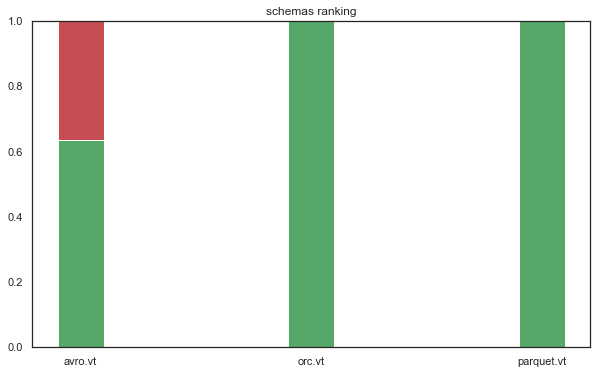

[0.9090909090909091, 1.0, 1.0] [0.09090909090909094, 0.0, 0.0]


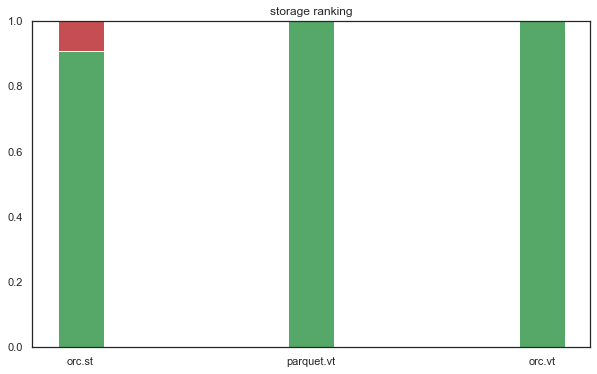

[1.0, 1.0, 0.9090909090909091] [0.0, 0.0, 0.09090909090909094]


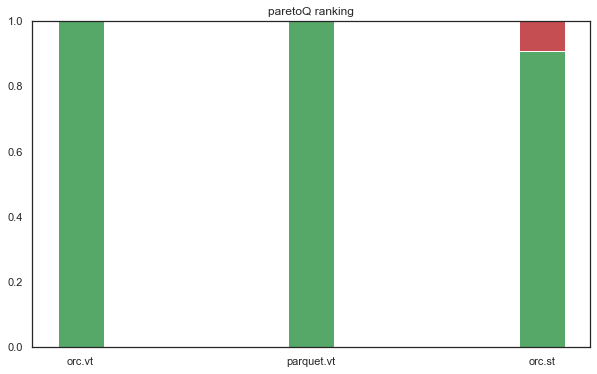

[1.0, 0.9090909090909091, 0.6363636363636364] [0.0, 0.09090909090909094, 0.36363636363636365]


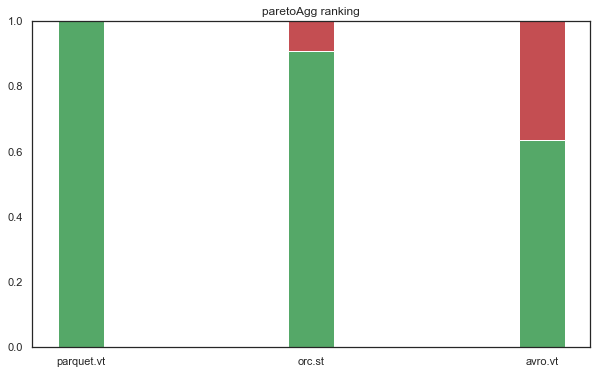

In [17]:
conf.plot(1)

In [13]:
conf.configurationQueryRanks(dimension = 'schemas', mode = 1)

,1,2,3,4,5,6,7,8,9,10,11
orc.vt,False,False,False,False,False,False,False,False,False,False,False
parquet.vt,False,False,False,False,False,False,False,False,False,False,False
avro.vt,True,False,False,True,False,True,False,True,False,False,False


### PAPyA.Ranker.Coherence

#### <i>class</i> Ranker.<b>Coherence</b>(<i>config_path, log_path, conformance_set</i>)
<i>Parameters:</i> <br>
&emsp; <b>config_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your configuration file(s). <i>i.e ./UIModule/settings_watdiv.yaml</small></i><br>
&emsp;<b>log_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your log file(s). <i>i.e ./UI Module/log_watdiv</small></i><br>
&emsp;<b>conformance_set : list</b><br>
&emsp;&emsp;<small>List of ranking criterions to see their kendall index's scores between ranking sets (i.e. dataset sizes).</small><br>

In [28]:
from Ranker import Coherence

coherence_set = ['schemas', 'storage', 'paretoQ', 'paretoAgg']
coh = Coherence(config_sp2bench, logs_sp2bench,coherence_set)

### Ranker.Coherence.run

#### Coherence.<b>run</b>(<i>rankset1, rankset2</i>)
<small>This method returns a table of coherence scores for each of the ranking criterion that user specify in the conformance_set by calculating the number of (dis)agreements between 2 ranking sets</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>rankset1 : str</b><br>
&emsp;&emsp;<small>a string of the _first_ rankset that user wants to compare</small><br><br>
&emsp; <b>rankset2 : str</b><br>
&emsp;&emsp;<small>a string of the _second_ rankset that user wants to compare</small><br>

In [29]:
#example of coherence scores for all ranking criterions by comparing 100M ranking set with 250M ranking set
coh.run('10M', '100K')

,Kendall's Index
schemas,0.439394
storage,0.469697
paretoQ,0.250000
paretoAgg,1.000000


### Ranker.Coherence.heatMap

#### Coherence.<b>heatMap</b>(<i>rankset1, rankset2, dimension</i>)
<small>This method returns a heat map table that shows the coherence between two particular ranking sets that user can choose, the heat map will be sorted by the best performing configurations of the first ranking set</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>rankset1 : str</b><br>
&emsp;&emsp;<small>a string of the _first_ rankset that user wants to compare</small><br><br>
&emsp; <b>rankset2 : str</b><br>
&emsp;&emsp;<small>a string of the _second_ rankset that user wants to compare</small><br>
&emsp; <b>dimension : str</b><br>
&emsp;&emsp;<small>user's choosen dimension to view the heat map</small><br><br>

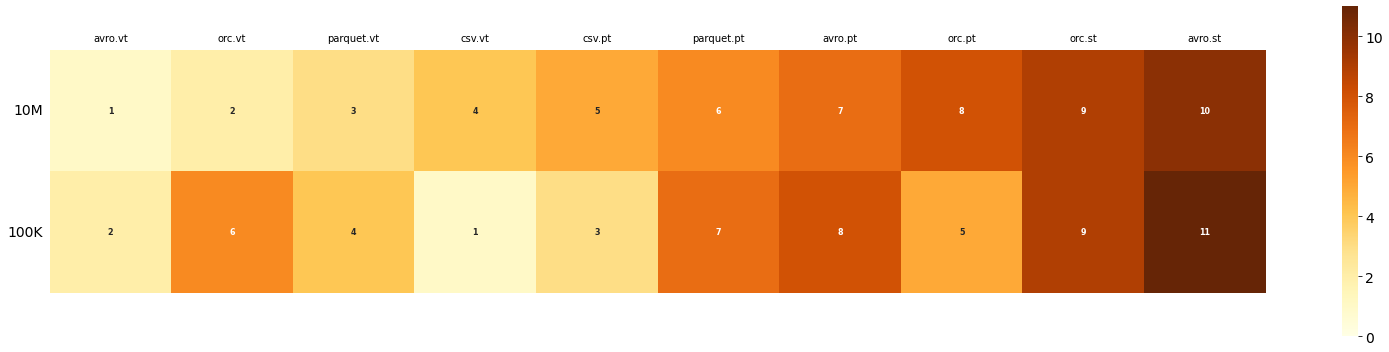

In [31]:
coh.heatMap('10M', "100K", dimension='schemas')

### Ranker.Coherence.heatMapSubtract

#### Coherence.<b>heatMap</b>(<i>*args, dimension</i>)
<small>This method shows the coherence differences between two particular ranking sets that user chooses, the first ranking sets will be the pivot point (between 100M-250M, and 100M-500M shown in the example). The heat map will be sorted by the best performing configurations of the first ranking set</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>*args : str</b><br>
&emsp;&emsp;<small>takes an arbitrary number of ranking sets, the first ranking set will be the pivot point for all the other ranking sets</small><br><br>
&emsp; <b>dimension : str</b><br>
&emsp;&emsp;<small>user's choosen dimension to view the heat map</small><br><br>

In [ ]:
coh.heatMapSubtract('100M', '250M', '500M', dimension='paretoAgg')